# Kate Naychuk

## Research question/interests

The Metacritic video game dataset can be used as a tool to analyze different trends that arise by comparing different columns, because of the different kinds of information each provides. A video game has a developer, and a developer may have multiple video games. Similarly, a video game has a genre, and a genre may apply to many different video games. Video game genres wax and wane in popularity. Also, video game developers do not necessarily restrict themselves to one particular genre. I wanted to explore the relationship between developer and genre: is there a specific genre that a developer tends to develop games of? If so, has this trend changed over the years for any particular developer, or has it remained largely the same?

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

This will load the data before any personalized changes are made.

In [9]:
df = pd.read_csv(r'../data/processed/games-data-processed.csv')
df

,name,platform,r-date,developer,genre,players
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,Nintendo,"Action Adventure,Fantasy",1 Player
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,NeversoftEntertainment,"Sports,Alternative,Skateboarding",02-Jan
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player
3,SoulCalibur,Dreamcast,08-Sep-99,Namco,"Action,Fighting,3D",02-Jan
4,Grand Theft Auto IV,Xbox360,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player
...,...,...,...,...,...,...
17939,Vroom in the Night Sky,Switch,05-Apr-17,Poisoft,"Sports,Individual,Biking",No Online Multiplayer
17940,Leisure Suit Larry: Box Office Bust,PlayStation3,05-May-09,Team17,"Action Adventure,Adventure,Third-Person,Open-W...",No Online Multiplayer
17941,Yaris,Xbox360,10-Oct-07,BackboneEntertainment,"Driving,Racing,Arcade,Arcade,Automobile",2 Online
17942,Ride to Hell: Retribution,PC,24-Jun-13,"Eutechnyx,DeepSilver","Driving,Modern,Racing,Motorcycle,Motocross,Mod...",No info


## Cleaning Data

I will clean the data by removing the columns I don’t need and removing the rows that are missing values. In this case, I do not need ‘Name’, ‘R-Date’, and ‘Developer’.

In [10]:
# Drops the columns that are not necessary for my analysis.
df = df.drop(columns=['name','r-date', 'developer'])
# Drops the rows that are missing player information.
df = df.drop(df[df.players == 'No info'].index)
# Displays a sample of what the table looks like after cleaning
df

,platform,genre,players
0,Nintendo64,"Action Adventure,Fantasy",1 Player
1,PlayStation,"Sports,Alternative,Skateboarding",02-Jan
2,PlayStation3,"Action Adventure,Modern,Modern,Open-World",1 Player
3,Dreamcast,"Action,Fighting,3D",02-Jan
4,Xbox360,"Action Adventure,Modern,Modern,Open-World",1 Player
...,...,...,...
17936,Xbox360,"Driving,Action Adventure,Modern,Racing,General...",No Online Multiplayer
17939,Switch,"Sports,Individual,Biking",No Online Multiplayer
17940,PlayStation3,"Action Adventure,Adventure,Third-Person,Open-W...",No Online Multiplayer
17941,Xbox360,"Driving,Racing,Arcade,Arcade,Automobile",2 Online


## Exploratory Data Analysis

Due to the way the values are formatted in the genre column, I am unable to find the unique values without using further methods.

In [11]:
# Holds one of every unique genre
unique_genres = []
# Loops through the original 'genre' column to find the unique values
for x in df['genre']:
    x2 = x.split(',')
    for y in x2:
        if not y in unique_genres:
            unique_genres.append(y)
print("A list of every unique genre found in the dataset")           
print(unique_genres)

A list of every unique genre found in the dataset
['Action Adventure', 'Fantasy', 'Sports', 'Alternative', 'Skateboarding', 'Modern', 'Open-World', 'Action', 'Fighting', '3D', 'Platformer', 'Shooter', 'First-Person', 'Sci-Fi', 'Arcade', 'Linear', 'Horror', 'Miscellaneous', 'Compilation', 'Role-Playing', 'Action RPG', 'Western-Style', 'Driving', 'Racing', 'GT / Street', 'PC-style RPG', '2D', 'Third-Person', 'Historic', 'Adventure', 'General', 'Traditional', 'Football', 'Sim', 'Japanese-Style', 'Puzzle', 'Console-style RPG', 'Strategy', 'Turn-Based', '4X', 'Real-Time', 'Survival', 'Command', 'Snowboarding', 'Sandbox', 'Soccer', 'Kart', "Beat-'Em-Up", 'Futuristic', 'Massively Multiplayer Online', 'Massively Multiplayer', 'Simulation', 'Automobile', 'Ice Hockey', 'Rhythm', 'Music', 'Virtual Life', 'Virtual', 'Wargame', 'Team', 'Tactical', 'Tactics', 'Point-and-Click', 'Snow / Water', 'Other', 'Individual', 'Golf', 'Flight', 'Civilian', 'Formula One', 'WWII', 'Combat', 'Space', 'Small Space

## Processing & Wrangling

This dataset allows multiple genres to apply to more than on video game. In order for me to retrieve an accurate count of genres, I first need to split all the genres so there is only one per row.

In [12]:
# Re-assigns all the values in the genre column to take one per row
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')
df.head(10)

,platform,genre,players
0,Nintendo64,Action Adventure,1 Player
0,Nintendo64,Fantasy,1 Player
1,PlayStation,Sports,02-Jan
1,PlayStation,Alternative,02-Jan
1,PlayStation,Skateboarding,02-Jan
2,PlayStation3,Action Adventure,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Open-World,1 Player
3,Dreamcast,Action,02-Jan


## Final Counts

In [14]:
print("The final counts for each column of the cleaned & processed dataset")
print(df.nunique())

The final counts for each column of the cleaned & processed dataset
platform     21
genre       169
players      54
dtype: int64


## Method Chaining

The function below will be able to perform everything I have done to the dataset before this

In [15]:
import project_functions1 as pf1

df = pf1.load_and_process(r"../data/processed/games-data-processed.csv")
df.head(10)

,platform,genre,players
0,Nintendo64,Action Adventure,1 Player
0,Nintendo64,Fantasy,1 Player
1,PlayStation,Sports,02-Jan
1,PlayStation,Alternative,02-Jan
1,PlayStation,Skateboarding,02-Jan
2,PlayStation3,Action Adventure,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Open-World,1 Player
3,Dreamcast,Action,02-Jan
3,Dreamcast,Fighting,02-Jan


## Data Analysis

Now that we have our data fully cleaned and processed, we can begin a dive into answering my research question; What is the relationship/trend between the genre of game and the number of players allowed. 
Due to the large number of unique values, I have taken the top genres and compared them with the top player counts. This will aid with the readability of the visualizations.

In [17]:
# Gets the top list of most popular genres
genre_count = df['genre'].value_counts()
df = df[~df['genre'].isin(genre_count[genre_count < 250].index)]
# Gets the top list of the most common number of players
player_count = df['players'].value_counts()
df = df[~df['players'].isin(player_count[player_count < 250].index)]

Here is a graph displaying the occurrence count for each of the genres I will be using

[Text(0, 0.5, 'Genre of Video Game'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Number of Video Games in Each Genre')]

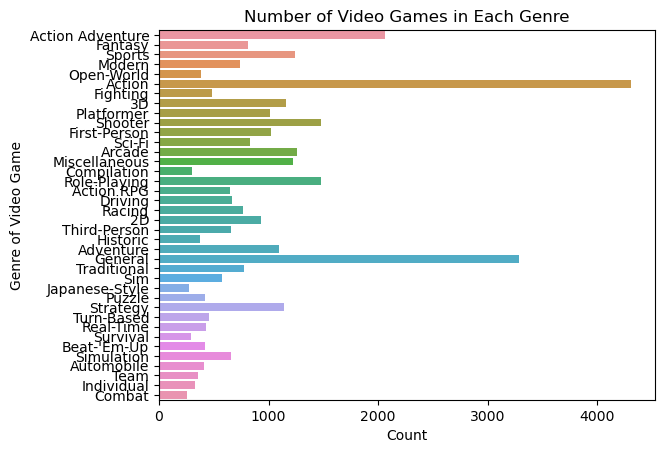

In [18]:
genre_countplot = sns.countplot(df, y='genre')
genre_countplot.set(ylabel="Genre of Video Game", xlabel="Count", title="Number of Video Games in Each Genre")

Here is a graph displaying the occurrence count for each of the players I will be using

[Text(0, 0.5, 'Number of Players'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Number of Players Per Video Game')]

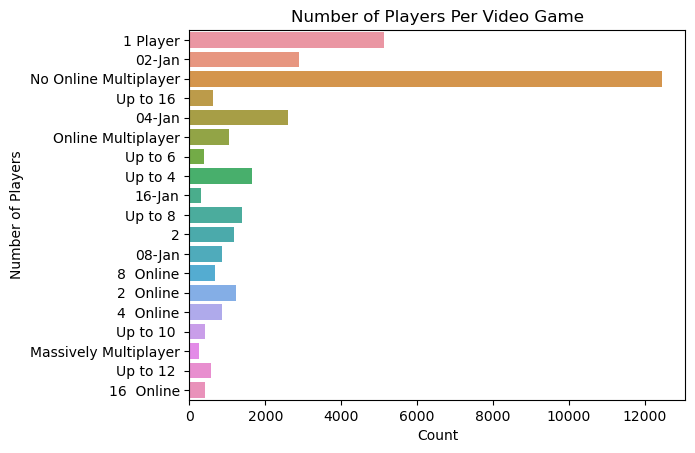

In [20]:
genre_countplot = sns.countplot(df, y='players')
genre_countplot.set(ylabel="Number of Players", xlabel="Count", title="Number of Players Per Video Game")

This displays all the genres and they number of players allowed. We can see from our first two graphs that the most popular genre is genre and the most common number of players is **No Online Multiplayer.** 
What is displayed below, represents that information accurately.

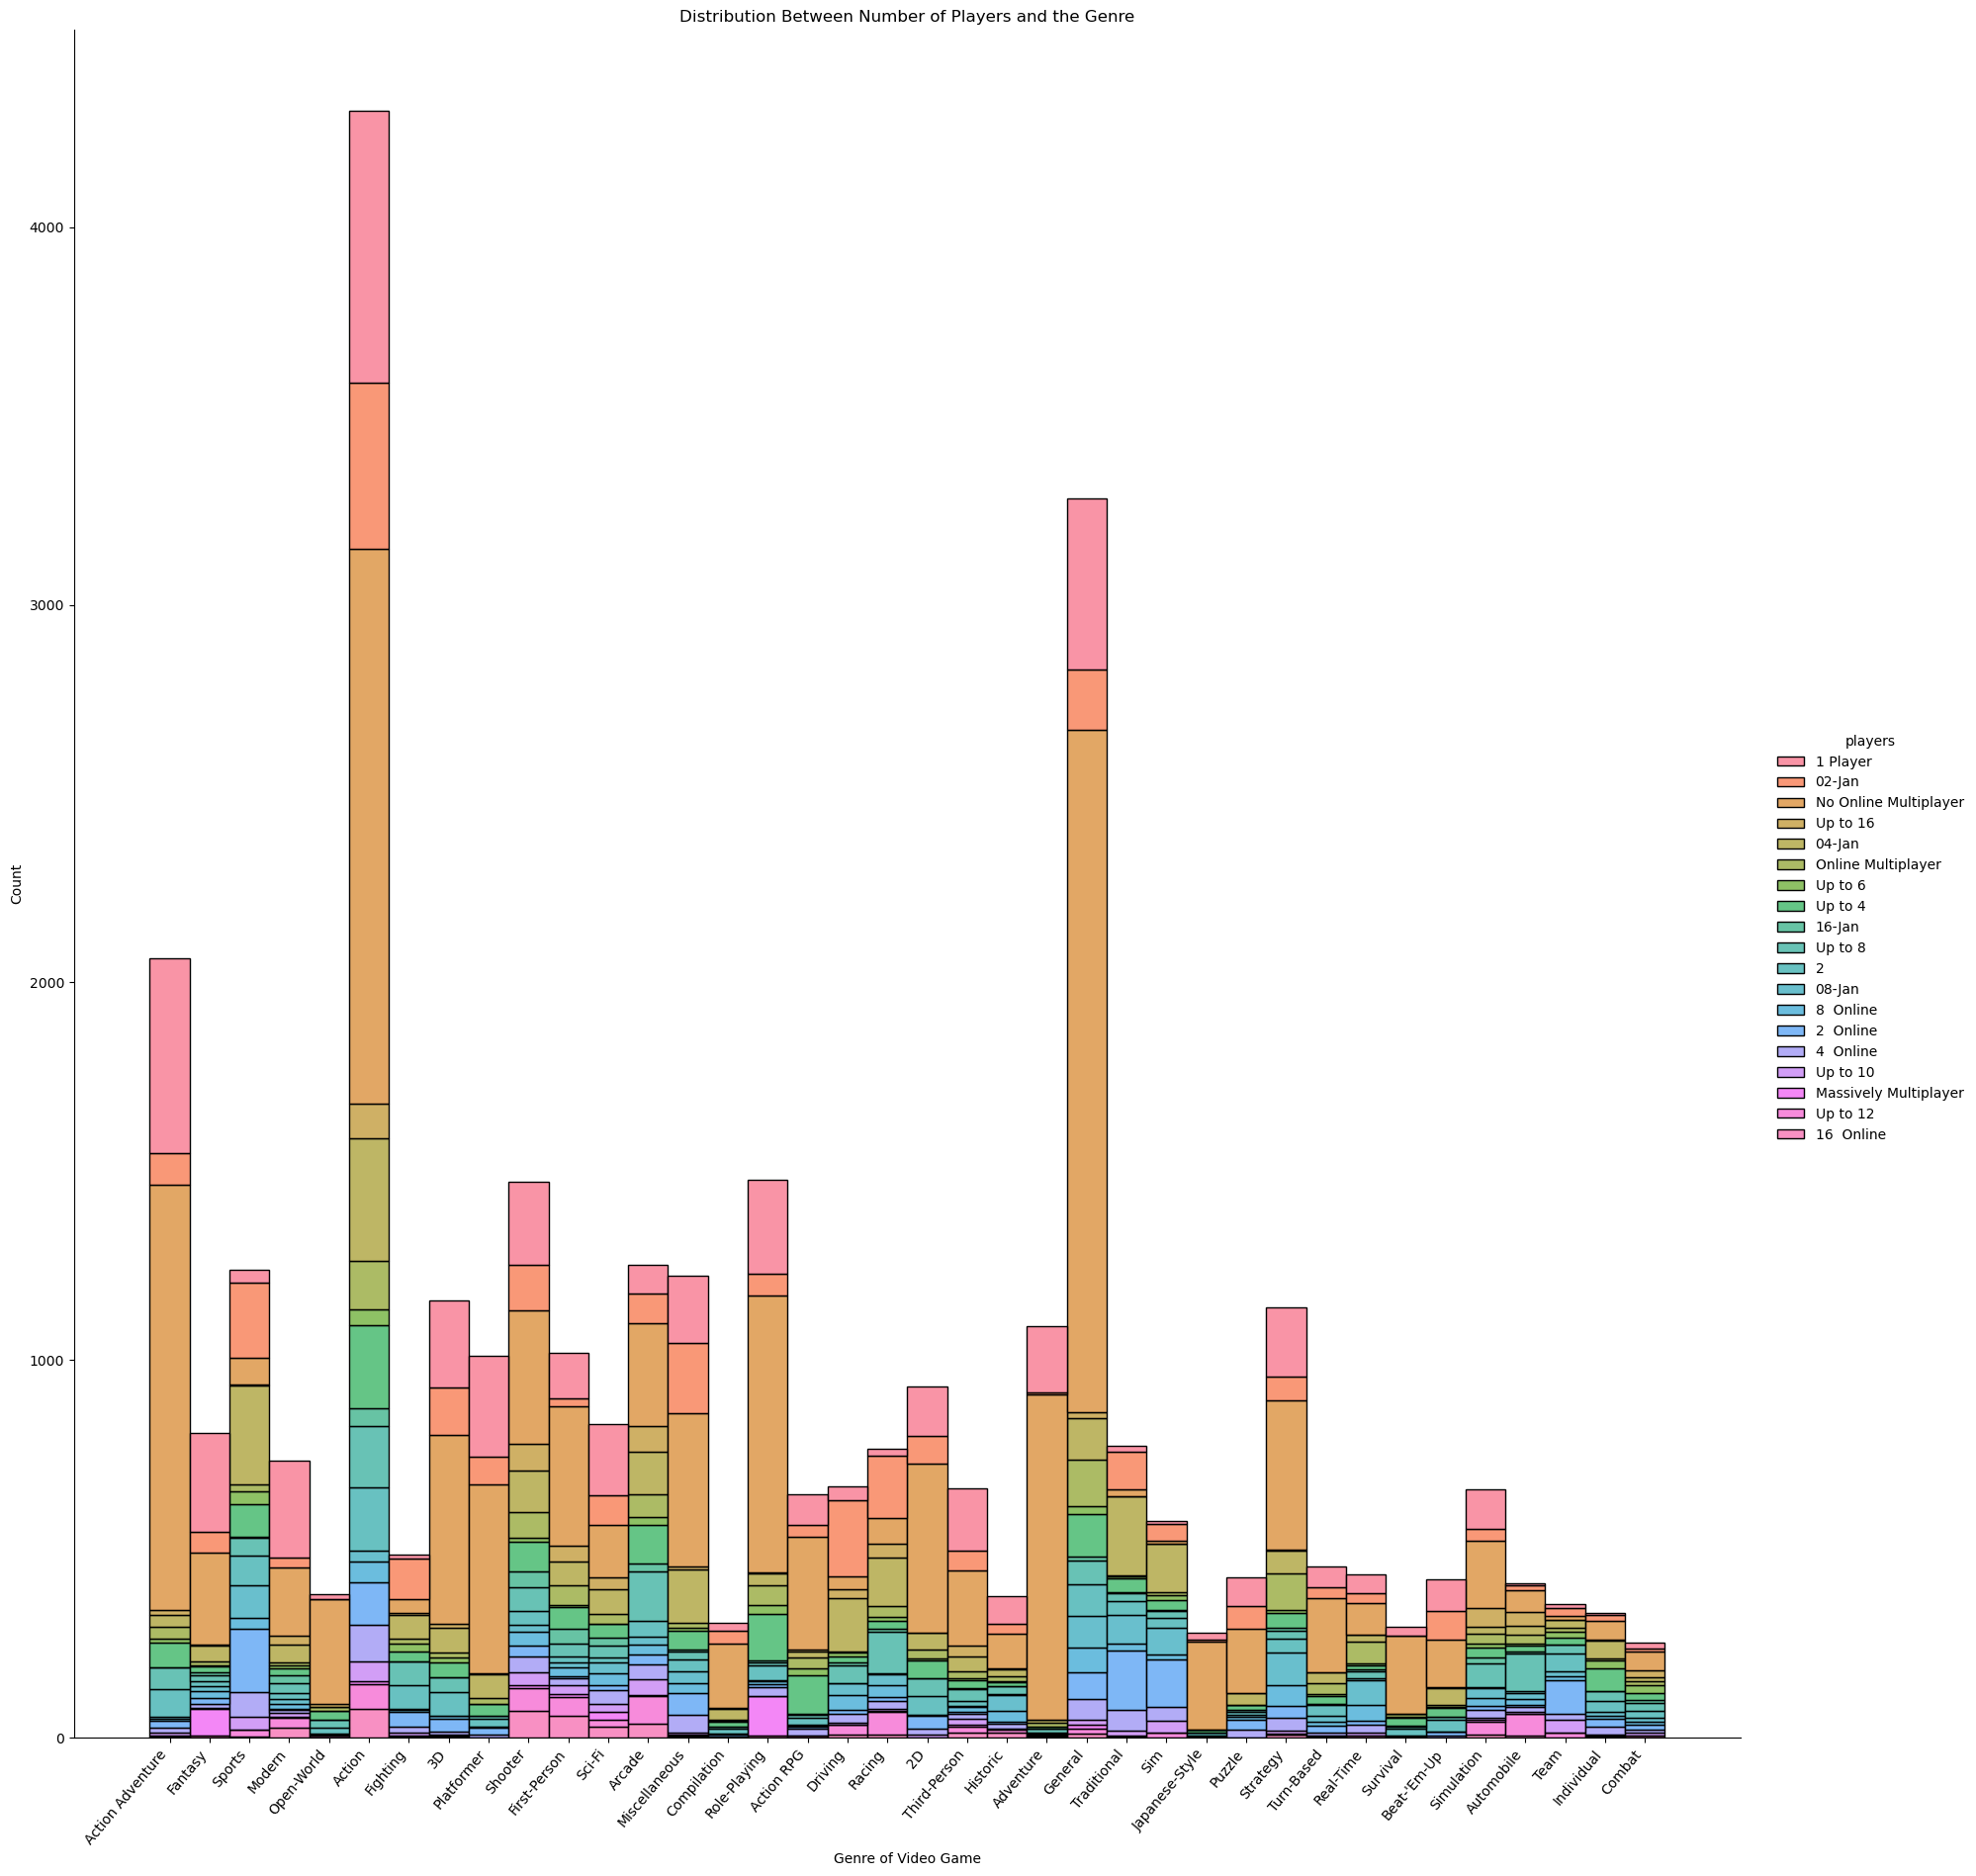

In [21]:
genres_displot = sns.displot(data=df, x=df["genre"], hue="players", height=18, aspect=1, multiple="stack")
genres_displot.set(xlabel="Genre of Video Game", ylabel="Count", title="Distribution Between Number of Players and the Genre")
genres_displot.set_xticklabels(rotation=50, ha="right")

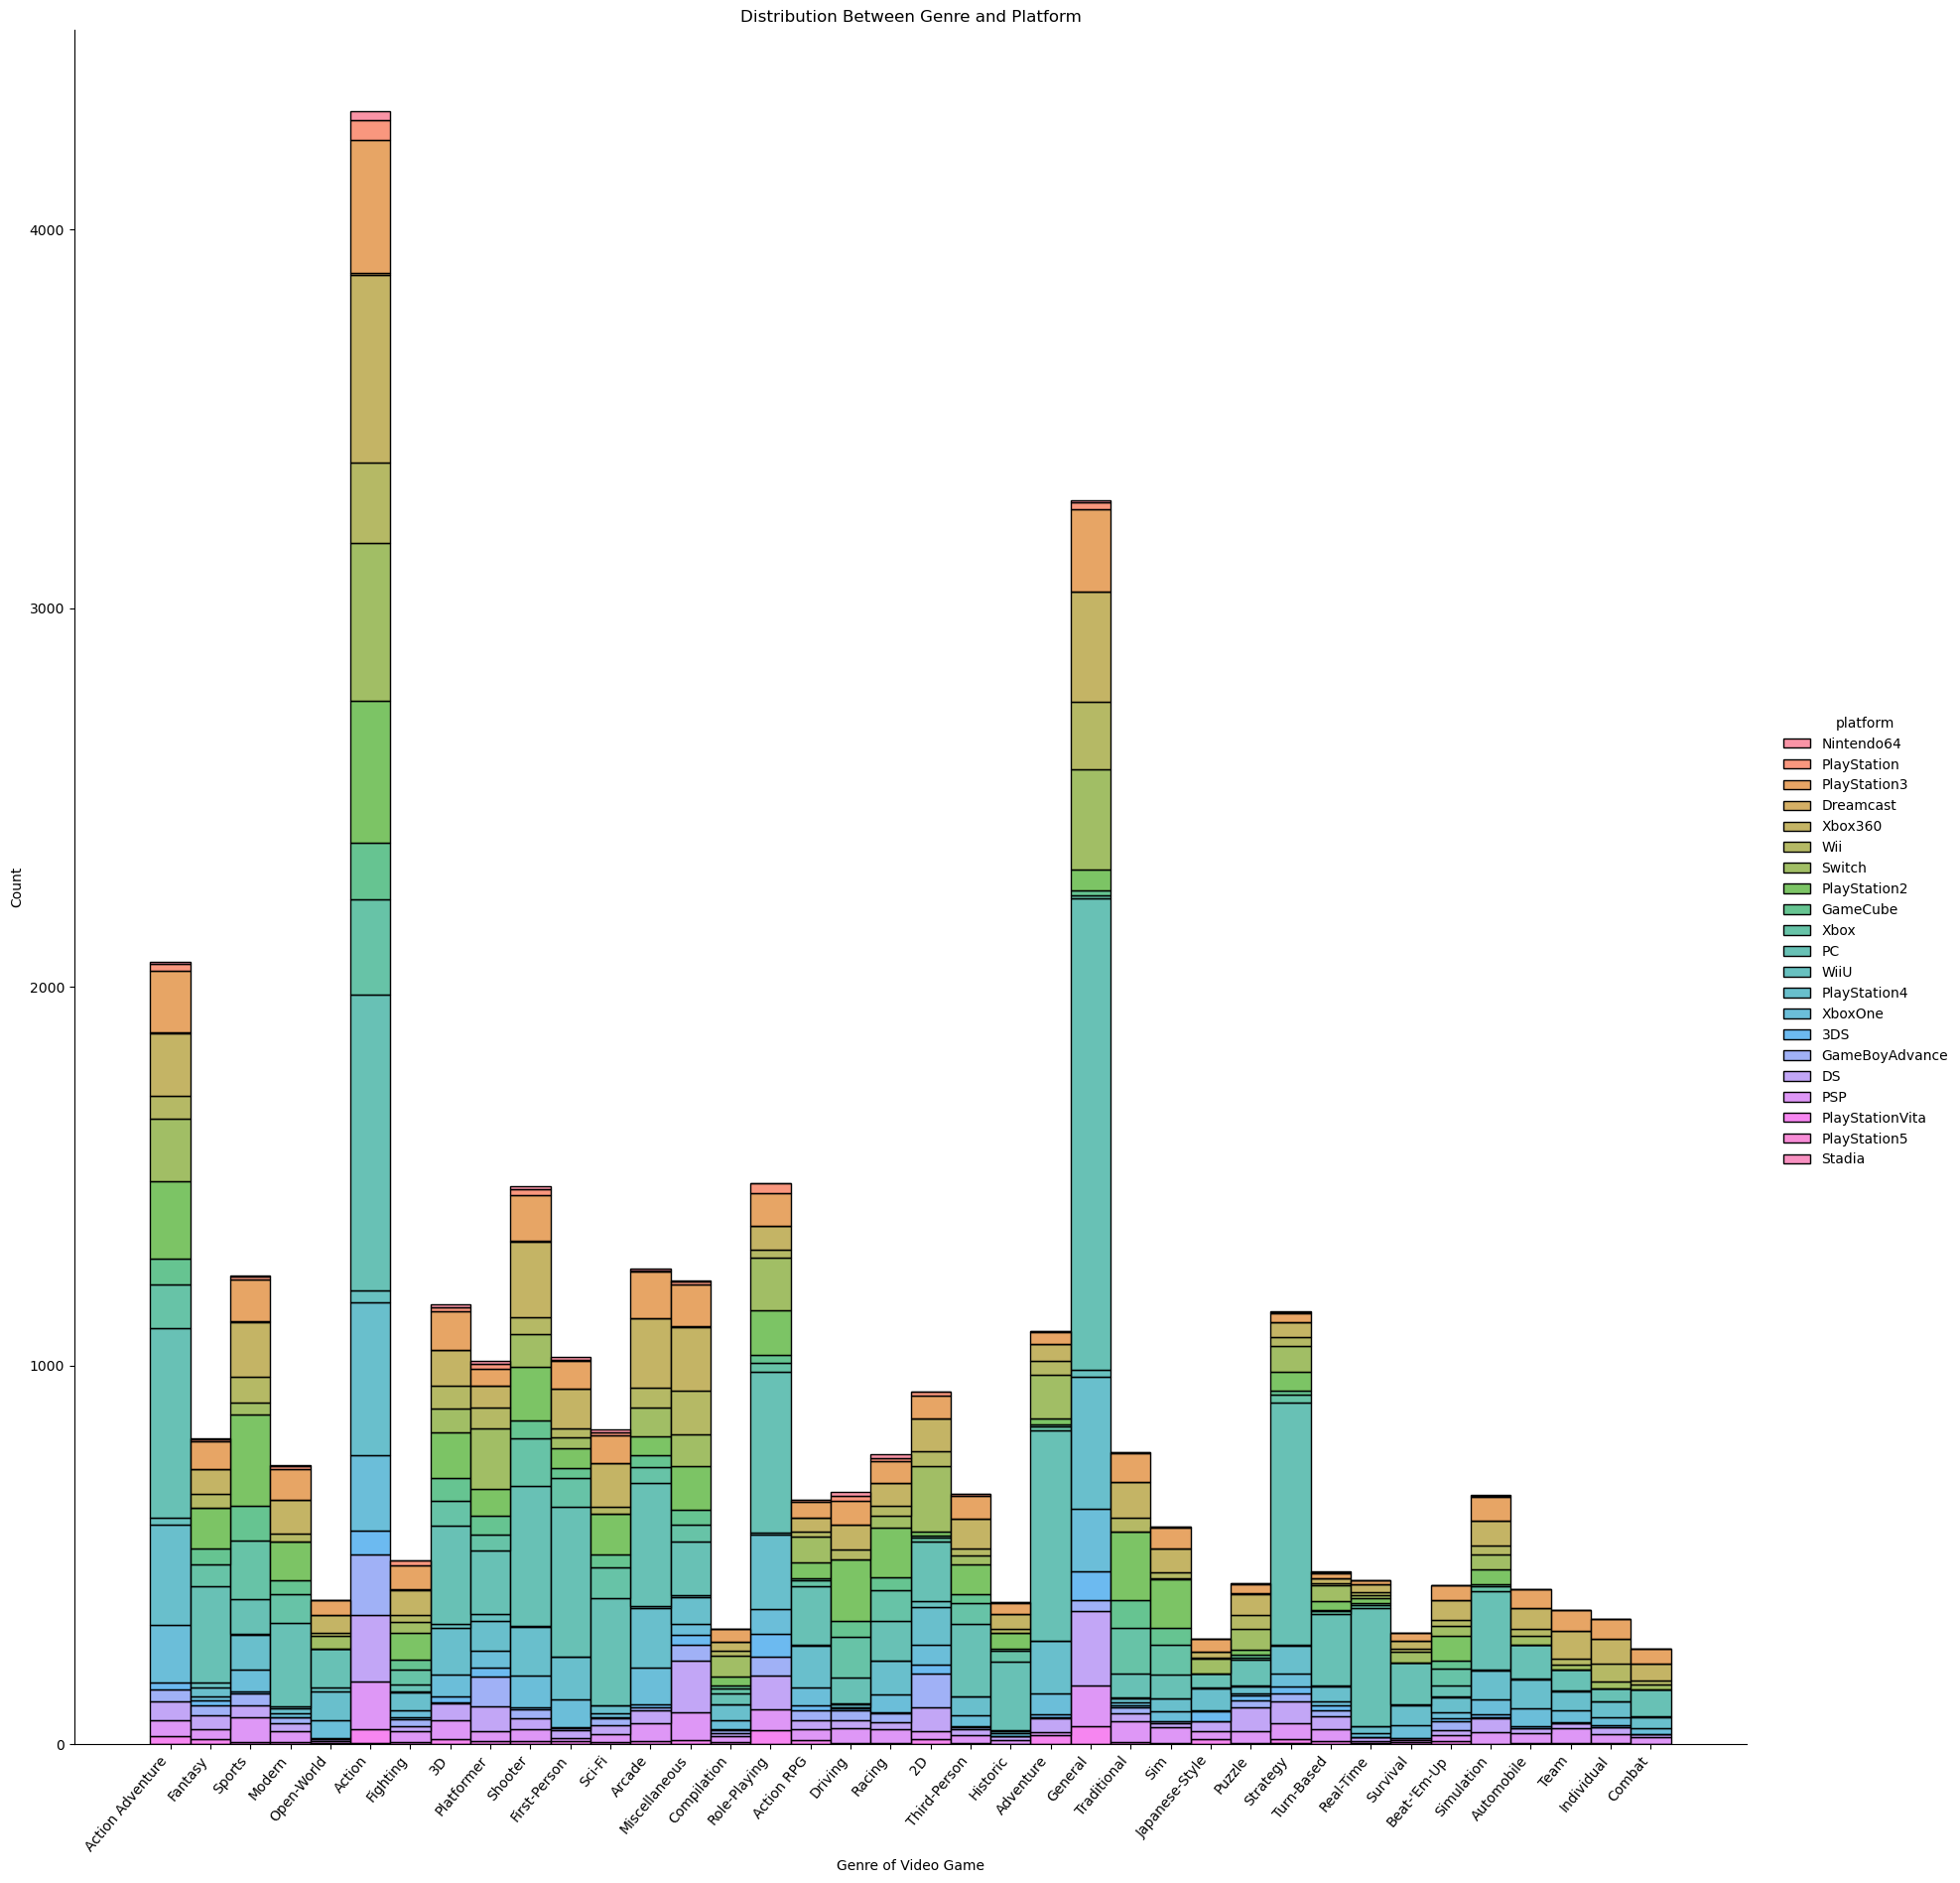

In [22]:
genres_displot = sns.displot(data=df, x=df["genre"], hue="platform", height=18, aspect=1, multiple="stack")
genres_displot.set(xlabel="Genre of Video Game", ylabel="Count", title="Distribution Between Genre and Platform")
genres_displot.set_xticklabels(rotation=50, ha="right")

This graph shows the distribution between the genre of game and the platforms they are played on. We could use this information to help identify if there is a link between the genre and number of players 
over time. This is because we can recognize that certain platforms were released first and that the ones released later could produce more complex game design which expands the opportunity for flexiblity in 
the number of players.

The platforms almost act as a timeline without refering to physical dates.

<hr>

In conclusion, the relationship between the genre of video game and the number of players depends on the developer to create new ideas and explore different combinations. In terms of the trend, the action genre is so widespread that we can see a variety of player amounts used for different purposes.

The mass majority of games are single player or don't have an online multiplayer option. This makes sense because most games have an option to play solo. For the games that do allow online play, we can see the player count is 'Up-to' which allows for further flexibility and playability for each user.